### Libraries and dependencies

In [15]:
# Import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

### Import and convert dataset

In [16]:
# Import dataset
NASA_dataset = pd.read_csv("/content/drive/MyDrive/IR-SEED/B0005.csv")

# Shuffle dataset
NASA_dataset = NASA_dataset.sample(frac=1, random_state=64)

# Drop unecessary columns
NASA_dataset = NASA_dataset.drop(["Current_charge", "Voltage_charge", "type", "ambient_temperature", "time", "Battery"], axis=1)

# Split to training and test sets
training_set = NASA_dataset[:int(len(NASA_dataset) * 0.8)]
testing_set = NASA_dataset[int(len(NASA_dataset) * 0.8):]

# Extract features
train_in = training_set.drop("Capacity", axis=1)
test_in = testing_set.drop("Capacity", axis=1)

# Extract labels
train_out = training_set["Capacity"]
test_out = testing_set["Capacity"]

# Convert features to tensors
train_in = tf.constant(train_in)
train_out = tf.constant(train_out)

# Convert labels to tensors
test_in = tf.constant(test_in)
test_out = tf.constant(test_out)

### Build model (using the Functional API)

In [17]:
# Seed rng
tf.random.set_seed(64)

# Define layers
input_layer = tf.keras.layers.Input(shape=train_in.shape[1:]) # Input layer
hidden_layer_1 = tf.keras.layers.Dense(10, activation="relu")(input_layer) # Hidden layer 1
hidden_layer_2 = tf.keras.layers.Dense(10, activation="relu")(hidden_layer_1)
output_layer = tf.keras.layers.Dense(1)(hidden_layer_2) # Output layer 

# Define model
soh_estimator = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

# Compile model
soh_estimator.compile(loss="mae",
                      optimizer="adam",
                      metrics="mse")

# Train model
history = soh_estimator.fit(train_in, train_out, epochs=10)

Epoch 1/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.9461 - mse: 13.8079
Epoch 2/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.3514 - mse: 0.2293
Epoch 3/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.3641 - mse: 0.2688
Epoch 4/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.2481 - mse: 0.1306
Epoch 5/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.2353 - mse: 0.1185
Epoch 6/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.1963 - mse: 0.0817
Epoch 7/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.1668 - mse: 0.0563
Epoch 8/10
1129/1129 [==============================] - 3s 3ms/step - loss: 0.1356 - mse: 0.0358
Epoch 9/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.1258 - mse: 0.0342
Epoch 10/10
1129/1129 [==============================] - 3s 2ms/step - loss: 0.0977 - mse: 0.0209


### Training visualization

In [18]:
pd.DataFrame(history.history)

,loss,mse
0,0.946111,13.807877
1,0.351380,0.229268
2,0.364117,0.268832
3,0.248050,0.130594
4,0.235287,0.118463
5,0.196348,0.081653
6,0.166772,0.056334
7,0.135582,0.035842
8,0.125798,0.034213
9,0.097672,0.020896


In [19]:
pd.DataFrame(history.history)[1:]

,loss,mse
1,0.351380,0.229268
2,0.364117,0.268832
3,0.248050,0.130594
4,0.235287,0.118463
5,0.196348,0.081653
6,0.166772,0.056334
7,0.135582,0.035842
8,0.125798,0.034213
9,0.097672,0.020896


Text(0.5, 0, 'Epochs')

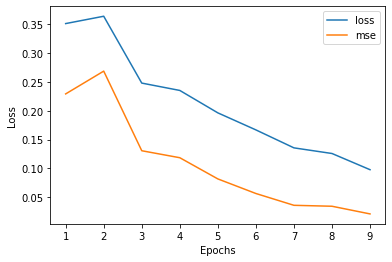

In [20]:
pd.DataFrame(history.history)[1:].plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

### Model evaluation

In [21]:
# evaluate()
soh_estimator.evaluate(test_in, test_out)

283/283 [==============================] - 1s 2ms/step - loss: 0.0616 - mse: 0.0056


[0.061616767197847366, 0.005582487676292658]

In [22]:
test_in

<tf.Tensor: shape=(9025, 5), dtype=float64, numpy=
array([[ 3.49843352e+00, -2.01420247e+00,  3.34222528e+01,
         2.01500000e+03,  4.20000000e+01],
       [ 3.86603840e+00, -2.01165855e+00,  2.61400353e+01,
         1.32047000e+02,  1.10000000e+02],
       [ 3.51623196e+00, -2.01391613e+00,  3.09461414e+01,
         9.65687000e+02,  1.50000000e+02],
       ...,
       [ 3.72000418e+00, -2.01322427e+00,  2.93400818e+01,
         5.53546000e+02,  8.50000000e+01],
       [ 3.66723755e+00, -2.01150584e+00,  2.93618032e+01,
         7.40969000e+02,  8.10000000e+01],
       [ 3.80996165e+00, -2.01401784e+00,  2.55818919e+01,
         1.69516000e+02,  1.46000000e+02]])>

In [23]:
test_out

<tf.Tensor: shape=(9025,), dtype=float64, numpy=
array([1.76231507, 1.44904216, 1.32387242, ..., 1.5382366 , 1.55976595,
       1.3231709 ])>

In [24]:
min(tf.squeeze(soh_estimator.predict(test_in)))

<tf.Tensor: shape=(), dtype=float32, numpy=1.2571585>

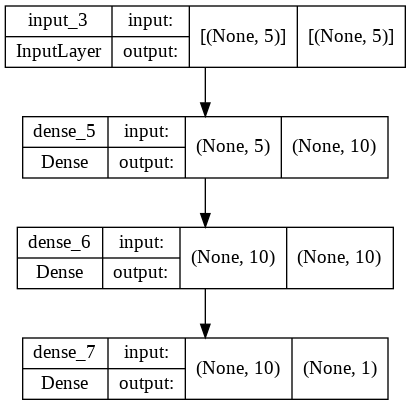

In [25]:
tf.keras.utils.plot_model(model=soh_estimator, show_shapes=True)